Initial shape: (1000, 9)

Total Sales by Product Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\AppData\Local\Temp\ipykernel_22916\698877779.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\categorical.py:641:


Top 10 Customers by Spend:
 Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64

✅ Enhanced analysis complete. All outputs saved to 'outputs' folder.


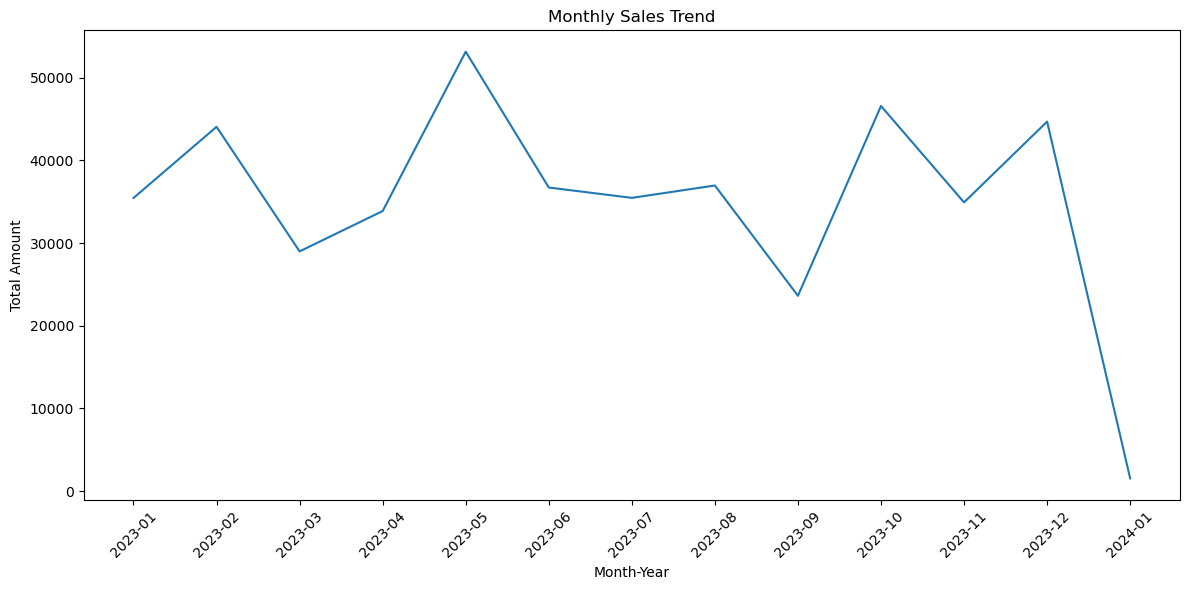

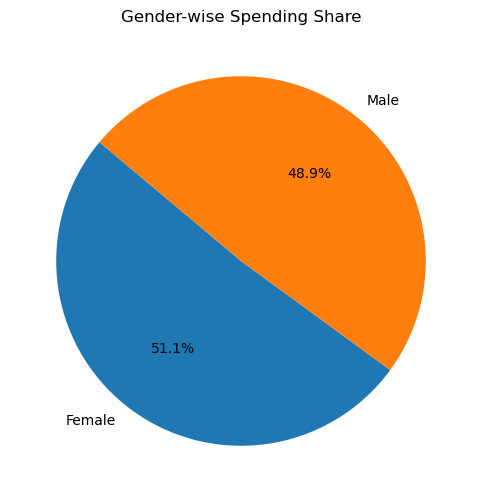

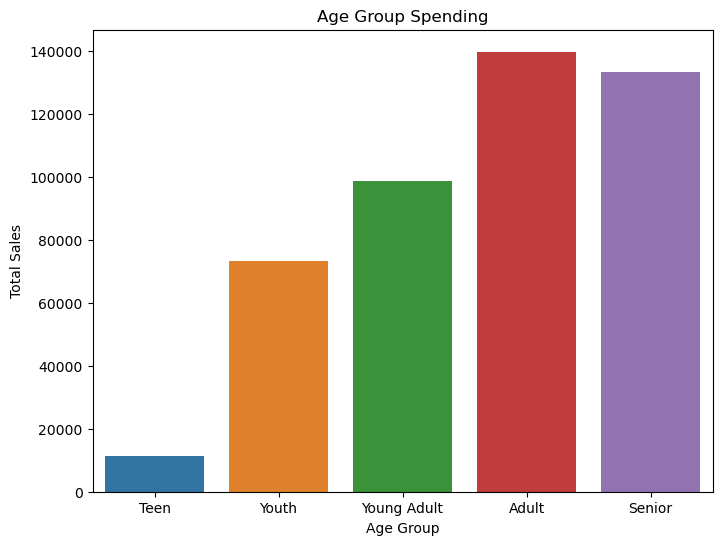

In [8]:
# retail_analysis_project/notebooks/retail_analysis.ipynb (Enhanced Version)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Set display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load data (replace with your file path)
data_path = r'C:\Users\santh\Downloads\retail_sales (2).csv'
df = pd.read_csv(data_path, parse_dates=['Date'])

# ----------------------- Data Cleaning ------------------------ #
print("Initial shape:", df.shape)
df.drop_duplicates(inplace=True)
df.dropna(subset=['Product Category', 'Total Amount', 'Date', 'Gender', 'Age'], inplace=True)

# -------------------- Feature Engineering --------------------- #
df['Month-Year'] = df['Date'].dt.to_period('M')
df['Total Amount'] = df['Quantity'] * df['Price per Unit']
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100],
                         labels=['Teen', 'Youth', 'Young Adult', 'Adult', 'Senior'])

# ------------------ Business Metric Enhancements ------------------ #
# Simulated Cost per Unit (70% to 90% of Price per Unit)
df['Cost per Unit'] = (df['Price per Unit'] * np.random.uniform(0.7, 0.9, size=len(df))).round(2)

# Simulated Inventory Days (random between 10 and 90)
df['Inventory Days'] = np.random.randint(10, 91, size=len(df))

# Profit Margin % per Unit
df['Profit Margin %'] = ((df['Price per Unit'] - df['Cost per Unit']) / df['Price per Unit'] * 100).round(2)

# Inventory Turnover = Quantity Sold / Inventory Days
df['Inventory Turnover'] = (df['Quantity'] / df['Inventory Days']).round(2)

# ------------------ Exploratory Data Analysis ------------------ #
os.makedirs("outputs", exist_ok=True)

# 1. Total Sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:\n", category_sales)

# 2. Monthly Sales Trend
monthly_sales = df.groupby('Month-Year')['Total Amount'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Total Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/monthly_sales_trend.png")

# 3. Gender-wise Spending
gender_sales = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6, 6))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender-wise Spending Share')
plt.savefig("outputs/gender_spending_pie.png")

# 4. Age Group Spending
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values)
plt.title('Age Group Spending')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.savefig("outputs/age_group_sales.png")

# 5. Top 10 Customers by Spend
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Spend:\n", top_customers)

# ---------------------- Save Outputs --------------------------- #
df.to_csv('outputs/cleaned_enhanced_data.csv', index=False)
category_sales.to_csv('outputs/category_sales.csv')
gender_sales.to_csv('outputs/gender_sales.csv')
age_group_sales.to_csv('outputs/age_group_sales.csv')
top_customers.to_csv('outputs/top_customers.csv')

print("\n✅ Enhanced analysis complete. All outputs saved to 'outputs' folder.")


C:\Users\santh\Downloads
